In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data1 = pd.read_csv("./data_encoded.csv")
data1

,Age,Gender,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Manager R&D,EmpJobRole_Manufacturing Director,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead
0,32,1,2,10,3,4,55,3,2,4,...,0,0,0,0,1,0,0,0,0,0
1,47,1,2,14,4,4,42,3,2,1,...,0,0,0,0,1,0,0,0,0,0
2,40,1,1,5,4,4,48,2,3,1,...,0,0,0,0,1,0,0,0,0,0
3,41,1,2,10,4,2,73,2,5,4,...,0,0,0,0,0,0,0,0,0,0
4,60,1,2,16,4,1,84,3,2,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,1,3,1,4,71,4,2,4,...,0,0,0,0,1,0,0,0,0,0
1196,37,1,2,10,2,4,80,4,1,4,...,0,0,0,0,0,0,1,0,0,0
1197,50,1,2,28,1,4,74,4,1,3,...,0,0,0,0,0,0,1,0,0,0
1198,34,0,2,9,3,4,46,2,3,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# fetching only continuous columns
# considering the previous assumption made in data exploratory part such that features with >=20 unique values are taken as continuous features
for column in data1.columns:
    if data1[column].nunique() >= 20:
        print(f'{column}: {data1[column].nunique()}')
        print("--------------------------------")   

Age: 43
--------------------------------
DistanceFromHome: 29
--------------------------------
EmpHourlyRate: 71
--------------------------------
TotalWorkExperienceInYears: 29
--------------------------------
ExperienceYearsAtThisCompany: 21
--------------------------------


In [8]:
continuous_columns= data1[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']]

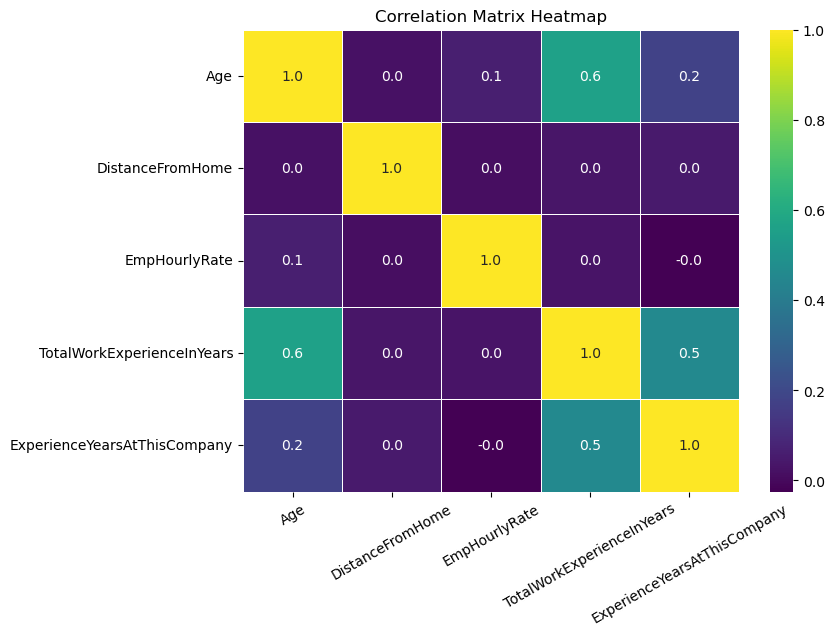

In [10]:
correlation_matrix = continuous_columns.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
h= sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".1f", linewidths=0.5)
h.set_xticklabels(h.get_xticklabels(), rotation= 30)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [12]:
numerical_columns = []

for column in data1:
    if data1[column].dtype != 'object':
        numerical_columns.append(column)

### Train test split

In [13]:
X = data1.drop('PerformanceRating', axis=1)
y = data1['PerformanceRating']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.2, random_state= 42)

In [15]:
# checking the shape 

print(f'X_train shape: {x_train.shape}\nX_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}\ny_test shape: {y_test.shape}')

X_train shape: (960, 52)
X_test shape: (240, 52)
y_train shape: (960,)
y_test shape: (240,)


In [16]:
# using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaling= MinMaxScaler()
x_train[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']] = scaling.fit_transform(x_train[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']])
x_test[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']] = scaling.transform(x_test[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']])

In [19]:
x_test.head()

,Age,Gender,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Manager R&D,EmpJobRole_Manufacturing Director,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead
811,35,0,2,23,4,3,30,3,1,1,...,0,0,0,0,0,0,0,0,0,0
1149,26,1,2,24,3,3,66,1,1,4,...,0,0,0,0,0,0,0,0,0,0
662,36,1,2,17,2,3,33,2,2,2,...,0,0,0,0,1,0,0,0,0,0
542,53,1,2,24,4,2,48,4,3,4,...,0,0,0,0,0,0,0,0,0,0
858,34,0,2,6,4,3,45,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# coverting y_test into a dataframe and storing test dataset as a separate csv file.
y_test= pd.DataFrame(y_test, columns=['PerformanceRating'])
y_test.head()

,PerformanceRating
811,3
1149,3
662,2
542,2
858,3


In [21]:
# separate csv file for test data
test_data= pd.concat([x_test, y_test], axis= 1)
test_data.head()

,Age,Gender,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Manufacturing Director,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,PerformanceRating
811,35,0,2,23,4,3,30,3,1,1,...,0,0,0,0,0,0,0,0,0,3
1149,26,1,2,24,3,3,66,1,1,4,...,0,0,0,0,0,0,0,0,0,3
662,36,1,2,17,2,3,33,2,2,2,...,0,0,0,1,0,0,0,0,0,2
542,53,1,2,24,4,2,48,4,3,4,...,0,0,0,0,0,0,0,0,0,2
858,34,0,2,6,4,3,45,2,2,2,...,0,0,0,0,0,0,0,0,0,3


In [23]:
test_data.to_csv("test_data.csv", index= False)

##### importing SMOTE--> oversampling technique

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_sm, y_train_sm= smote.fit_resample(x_train, y_train)

In [25]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

Counter({3: 699, 2: 155, 4: 106})
Counter({3: 699, 2: 699, 4: 699})


In [26]:
# storing processed data as a separate file for training models
processed_data= pd.concat([X_train_sm, y_train_sm], axis= 1)
processed_data.head()

,Age,Gender,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Manufacturing Director,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,PerformanceRating
0,28,1,1,7,3,3,55,3,2,1,...,0,0,0,1,0,0,0,0,0,3
1,25,0,2,4,2,2,99,2,2,4,...,0,0,0,1,0,0,0,0,0,2
2,25,0,2,1,3,4,40,3,1,2,...,0,0,1,0,0,0,0,0,0,3
3,31,1,2,5,3,1,51,3,2,3,...,0,0,0,1,0,0,0,0,0,4
4,30,1,2,2,1,3,72,3,1,2,...,0,0,0,0,1,0,0,0,0,3


In [27]:
processed_data.to_csv("processed_data.csv", index= False) # contains only training data for model

### DECISION TREE MODEL

In [28]:
# Training the decision tree model

# importing the model
from sklearn.tree import DecisionTreeClassifier

# Initializing the model
dt_model= DecisionTreeClassifier()

# fitting the model to the train data
dt_model.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [29]:
# prediction

y_pred_dt= dt_model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [31]:
# model evaluation

# Checking Accuracy score
dt_accuracy_score = accuracy_score(y_test, y_pred_dt)
print(f'Model accuracy score: {dt_accuracy_score}')

Model accuracy score: 0.8833333333333333


In [32]:
# Checking for overfitting and underfitting

Training_accuracy= dt_model.score(X_train_sm, y_train_sm)
Testing_accuracy= dt_model.score(x_test, y_test)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 1.0
Testing set score: 0.8833333333333333


In [33]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [34]:
# K-Fold Cross-validation

kf_dt_model = KFold(n_splits= 10, shuffle= False)

In [35]:
# cross validation accuracy

score = cross_val_score(dt_model, X, y, cv=kf_dt_model, scoring='accuracy')
print(f'Cross validation accuracy scores: {score}')

Cross validation accuracy scores: [0.86666667 0.90833333 0.925      0.88333333 0.93333333 0.925
 0.86666667 0.85833333 0.89166667 0.89166667]


In [36]:
DT_acc= pd.DataFrame({'CV mean': score.mean(), 'Std': score.std()}, index= ['Cross validation accuracy'])
DT_acc

,CV mean,Std
Cross validation accuracy,0.895,0.025604


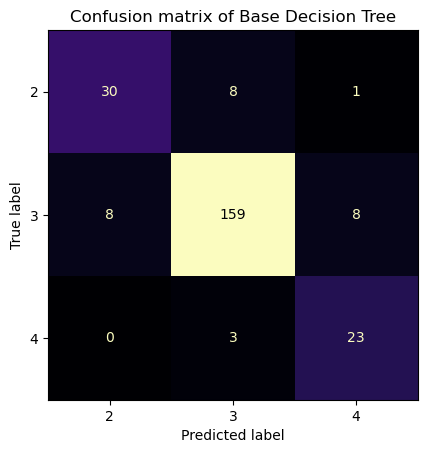

In [37]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_model, x_test, y_test, colorbar=False, cmap='magma')
plt.title('Confusion matrix of Base Decision Tree')
plt.grid(False)

In [38]:
# classification report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           2       0.79      0.77      0.78        39
           3       0.94      0.91      0.92       175
           4       0.72      0.88      0.79        26

    accuracy                           0.88       240
   macro avg       0.81      0.85      0.83       240
weighted avg       0.89      0.88      0.88       240



In [40]:
# saving tuned Decision Tree model as pkl file

import joblib
joblib.dump(dt_model,"decision_tree_base_model.pkl")

['decision_tree_base_model.pkl']

In [41]:
# Performance metrics

'''Defining a function to calculate all the required performance metrics
for the given model'''
def metrics_calculator(y_test, y_pred, model_name):
    result=pd.DataFrame(
        data=[
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred, average= 'macro'),
            recall_score(y_test, y_pred, average= 'macro'),
            f1_score(y_test, y_pred, average= 'macro')
        ],
        index=['Accuracy','precision','Recall', 'F1-score'],
        columns= [model_name]
    )
    return result

In [43]:
Base_dt_result= metrics_calculator(y_test, y_pred_dt, 'Base Decision Tree')
Base_dt_result.style.background_gradient(cmap='inferno')

,Base Decision Tree
Accuracy,0.883333
precision,0.814506
Recall,0.854139
F1-score,0.831354


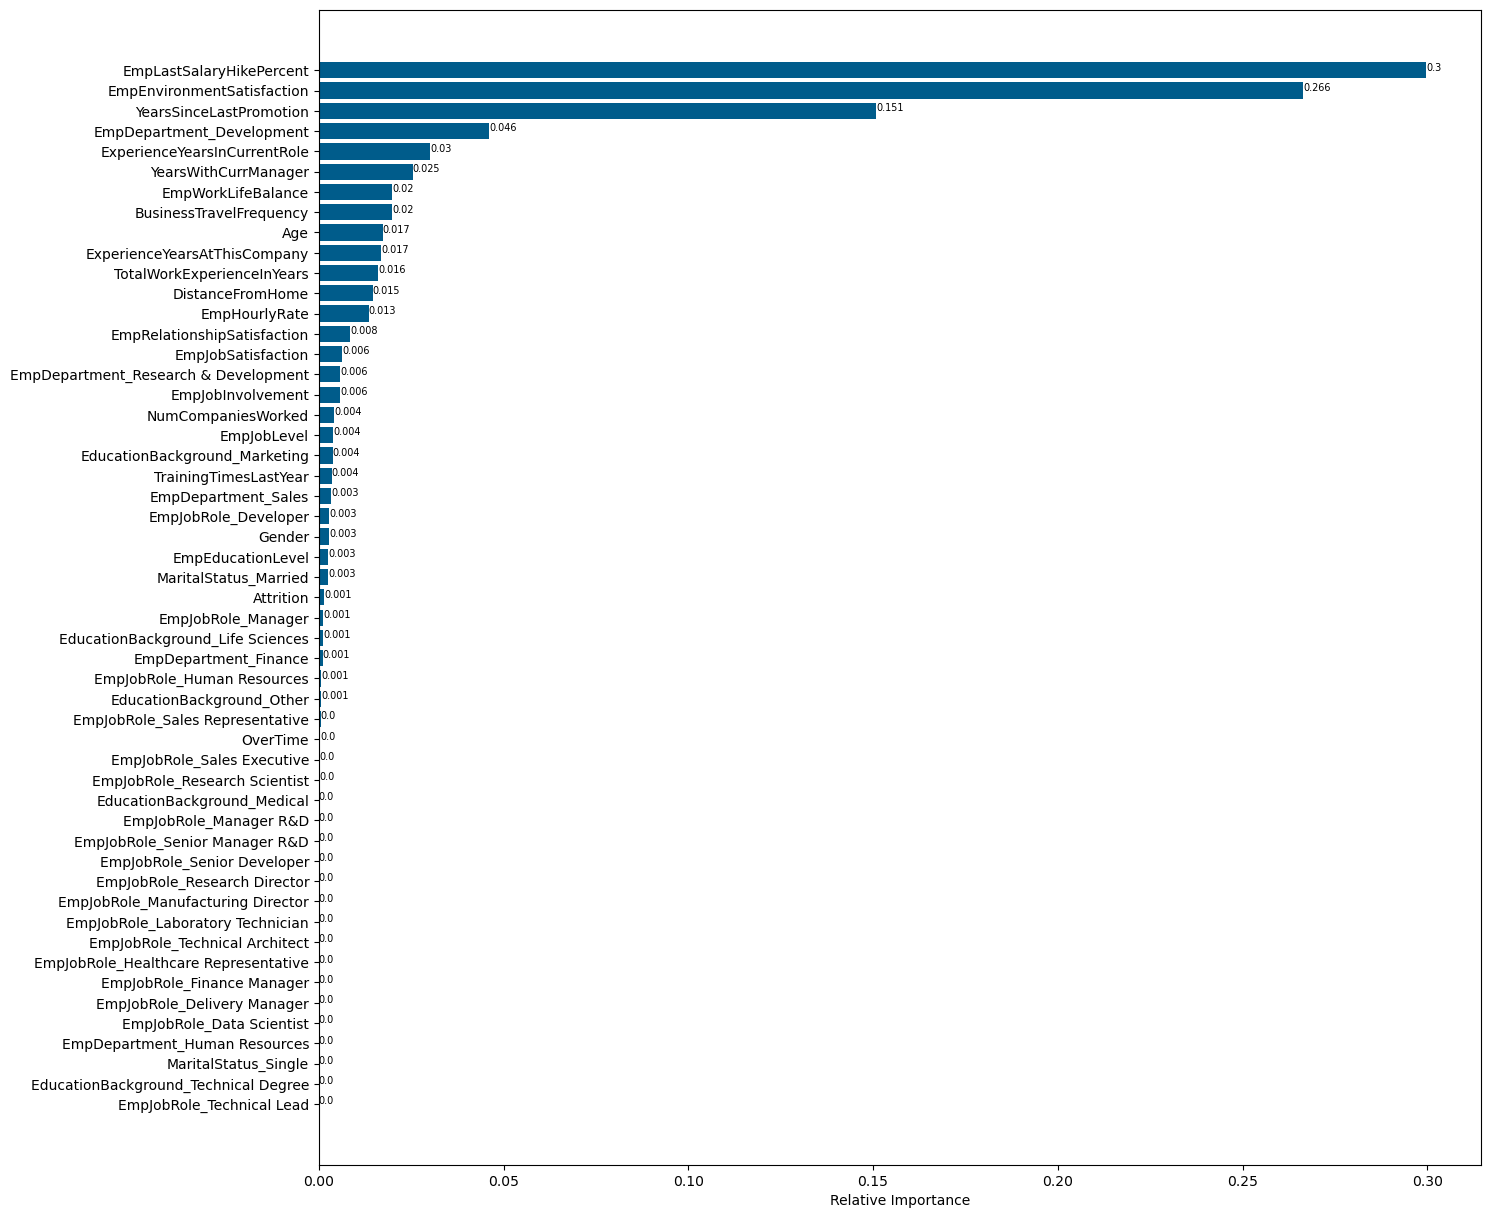

In [44]:
# feature importance

#getting feature importances from the decision tree model
importances= dt_model.feature_importances_
feature_names= X.columns

# sort the features by importance
indices= np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize= (15, 15))
plt.barh(range(len(indices)), importances[indices], color= '#005c8b', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

### Hyperparameter tuning for decision tree model

In [45]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 30, 40],
    'min_samples_leaf': [10, 20, 30, 40],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train_sm, y_train_sm)
best_params = grid_search.best_params_

print(f'Best parameters: {best_params}')

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [46]:
tuned_dt = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_split'], min_samples_split=best_params['min_samples_split'])
tuned_dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=20)

In [47]:
y_prediction_tuned_dt = tuned_dt.predict(x_test)
y_prediction_tuned_dt

array([3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 4, 3, 3, 4, 3, 3, 2,
       3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 3, 4, 4, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 4,
       4, 3, 2, 4, 3, 3, 2, 2, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2],
      dtype=int64)

In [48]:
accuracy_score_tuned_dt = accuracy_score(y_test, y_prediction_tuned_dt)
print(f'Accuracy after Hyperparameter tuning: {accuracy_score_tuned_dt * 100}%')

Accuracy after Hyperparameter tuning: 89.16666666666667%


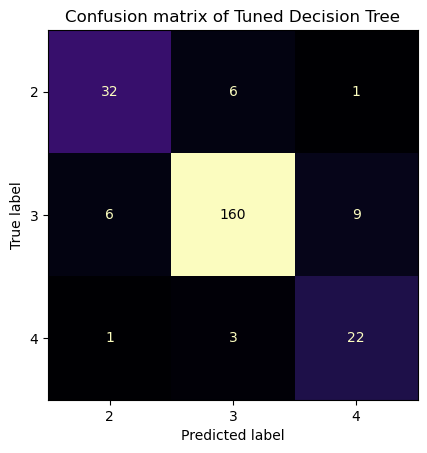

In [49]:
# Tuned model confusion matrix

ConfusionMatrixDisplay.from_estimator(tuned_dt, x_test, y_test, colorbar= False, cmap= 'magma')
plt.title('Confusion matrix of Tuned Decision Tree')
plt.grid(False)

In [51]:
print(classification_report(y_test, y_prediction_tuned_dt))

              precision    recall  f1-score   support

           2       0.82      0.82      0.82        39
           3       0.95      0.91      0.93       175
           4       0.69      0.85      0.76        26

    accuracy                           0.89       240
   macro avg       0.82      0.86      0.84       240
weighted avg       0.90      0.89      0.89       240



In [53]:
# saving tuned Decision Tree model after tunning as pkl file

import joblib
joblib.dump(tuned_dt,"decision_tree_trained_and_tuned_model.pkl")

['decision_tree_trained_and_tuned_model.pkl']

In [54]:
DT_Model_after_tuning = metrics_calculator(y_test, y_prediction_tuned_dt, 'Decision Tree After Tunning')
DT_Model_after_tuning

,Decision Tree After Tunning
Accuracy,0.891667
precision,0.818253
Recall,0.860317
F1-score,0.836455


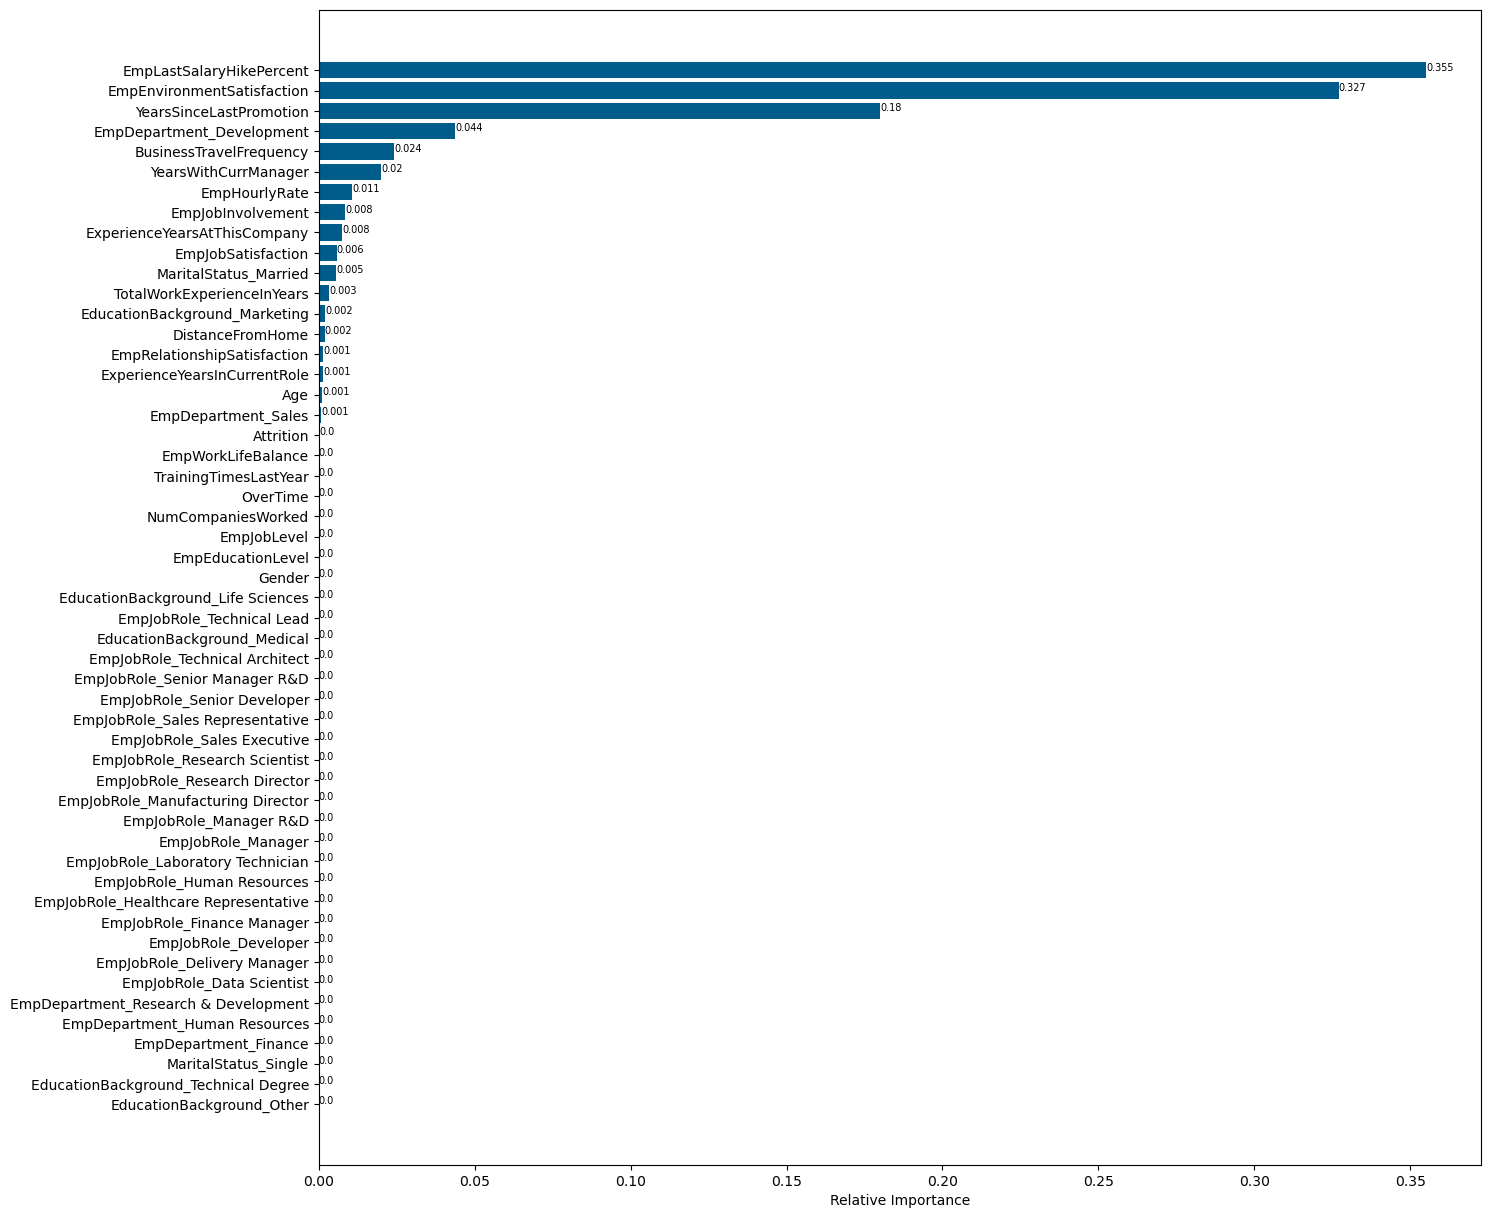

In [55]:
# tuned model feature importance

#getting feature importances from the tuned decision tree model
importances = tuned_dt.feature_importances_
feature_names = X.columns

# sort the features by importance
indices= np.argsort(importances)

# Creating a horizontal bar plot of the feature importances
plt.figure(figsize = (15, 15))
plt.barh(range(len(indices)), importances[indices], color= '#005c8b', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Adding labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

### RANDOM FOREST MODEL

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
random_classifier = RandomForestClassifier()
random_classifier.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [58]:
y_random_prediction = random_classifier.predict(x_test)

In [59]:
rf_accuracy = accuracy_score(y_test, y_random_prediction)
print(f'Accuracy after Random Forest is {rf_accuracy * 100}%')

Accuracy after Random Forest is 92.5%


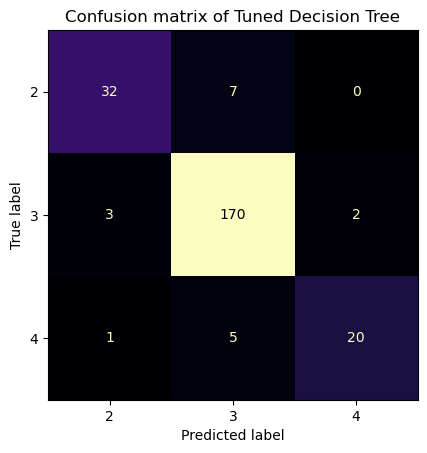

In [61]:
ConfusionMatrixDisplay.from_estimator(random_classifier, x_test, y_test, colorbar= False, cmap= 'magma')
plt.title('Confusion matrix of Tuned Decision Tree')
plt.grid(False)

In [62]:
print(classification_report(y_test, y_random_prediction))

              precision    recall  f1-score   support

           2       0.89      0.82      0.85        39
           3       0.93      0.97      0.95       175
           4       0.91      0.77      0.83        26

    accuracy                           0.93       240
   macro avg       0.91      0.85      0.88       240
weighted avg       0.92      0.93      0.92       240



In [63]:
# saving tuned random forest model as pkl file

import joblib
joblib.dump(random_classifier,"random_forest_base_trained_model.pkl")

['random_forest_base_trained_model.pkl']

In [64]:
Base_rf_result = metrics_calculator(y_test, y_random_prediction, 'Base Random Forest')
Base_rf_result

,Base Random Forest
Accuracy,0.925000
precision,0.910682
Recall,0.853724
F1-score,0.879683


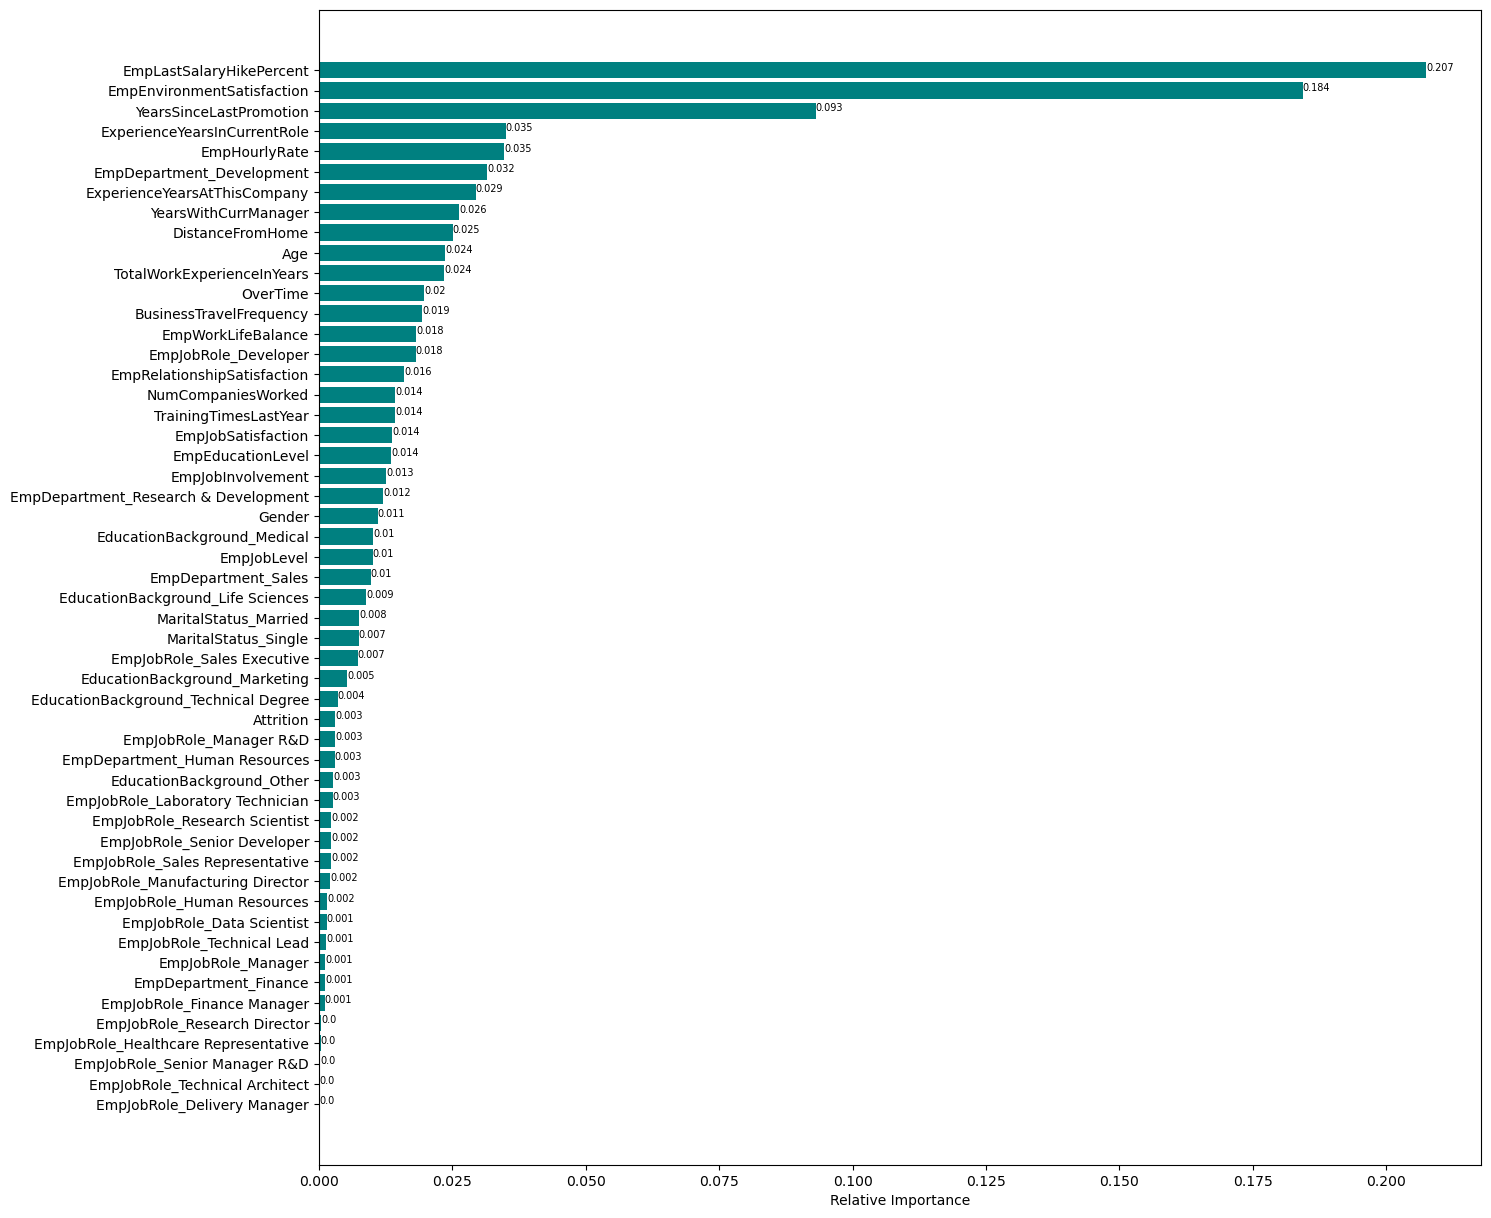

In [65]:
# Random Forest feature importance

#getting feature importances from the random forest model
importances= random_classifier.feature_importances_
feature_names= X.columns

# sort the features by importance
indices= np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize= (15, 15))
plt.barh(range(len(indices)), importances[indices], color= 'teal', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

### Hyperparameter tuning for random forest model

In [66]:
# Perform GridSearchCV for Random Forest Model

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
random_classifier_grid_search = GridSearchCV(estimator=random_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
random_classifier_grid_search.fit(X_train_sm, y_train_sm)

print("Best Parameters:", random_classifier_grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [67]:
tuned_rf = RandomForestClassifier(bootstrap=random_classifier_grid_search.best_params_['bootstrap'], max_depth=random_classifier_grid_search.best_params_['max_depth'], min_samples_split=random_classifier_grid_search.best_params_['min_samples_split'], max_features=random_classifier_grid_search.best_params_['max_features'], min_samples_leaf=random_classifier_grid_search.best_params_['min_samples_leaf'], n_estimators=random_classifier_grid_search.best_params_['n_estimators'])
tuned_rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_features='sqrt')

In [68]:
y_prediction_tuned_rf = tuned_rf.predict(x_test)
y_prediction_tuned_rf

array([3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 3, 4, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3,
       4, 3, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2],
      dtype=int64)

In [69]:
# Accuracy for Random Classifier after Tunning
accuracy_score_tuned_rf = accuracy_score(y_test, y_prediction_tuned_rf)
print(f'Accuracy after Hyper parameter tunning: {accuracy_score_tuned_rf * 100}%')

Accuracy after Hyper parameter tunning: 93.33333333333333%


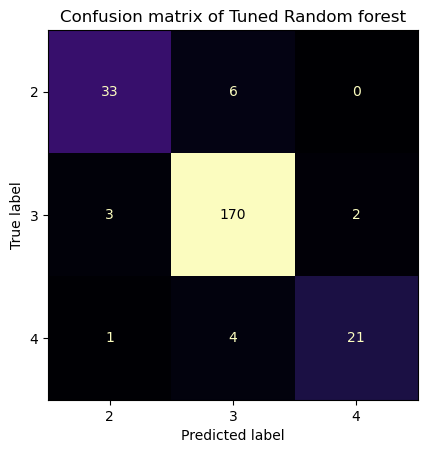

In [71]:
# Tuned model confusion matrix

ConfusionMatrixDisplay.from_estimator(tuned_rf, x_test, y_test, colorbar= False, cmap= 'magma')
plt.title('Confusion matrix of Tuned Random forest')
plt.grid(False)

In [72]:
print(classification_report(y_test, y_prediction_tuned_rf))

              precision    recall  f1-score   support

           2       0.89      0.85      0.87        39
           3       0.94      0.97      0.96       175
           4       0.91      0.81      0.86        26

    accuracy                           0.93       240
   macro avg       0.92      0.88      0.89       240
weighted avg       0.93      0.93      0.93       240



In [74]:
# tuned model performance metrics

tuned_rf_result= metrics_calculator(y_test, y_prediction_tuned_rf, 'Tuned Random Forest')
tuned_rf_result.style.background_gradient(cmap='inferno')

,Tuned Random Forest
Accuracy,0.933333
precision,0.916460
Recall,0.875092
F1-score,0.894437


In [121]:
# saving tuned random forest model as pkl file

import joblib
joblib.dump(tuned_rf,"random_forest_trained_and_tuned_model.pkl")

['random_forest_trained_and_tuned_model.pkl']

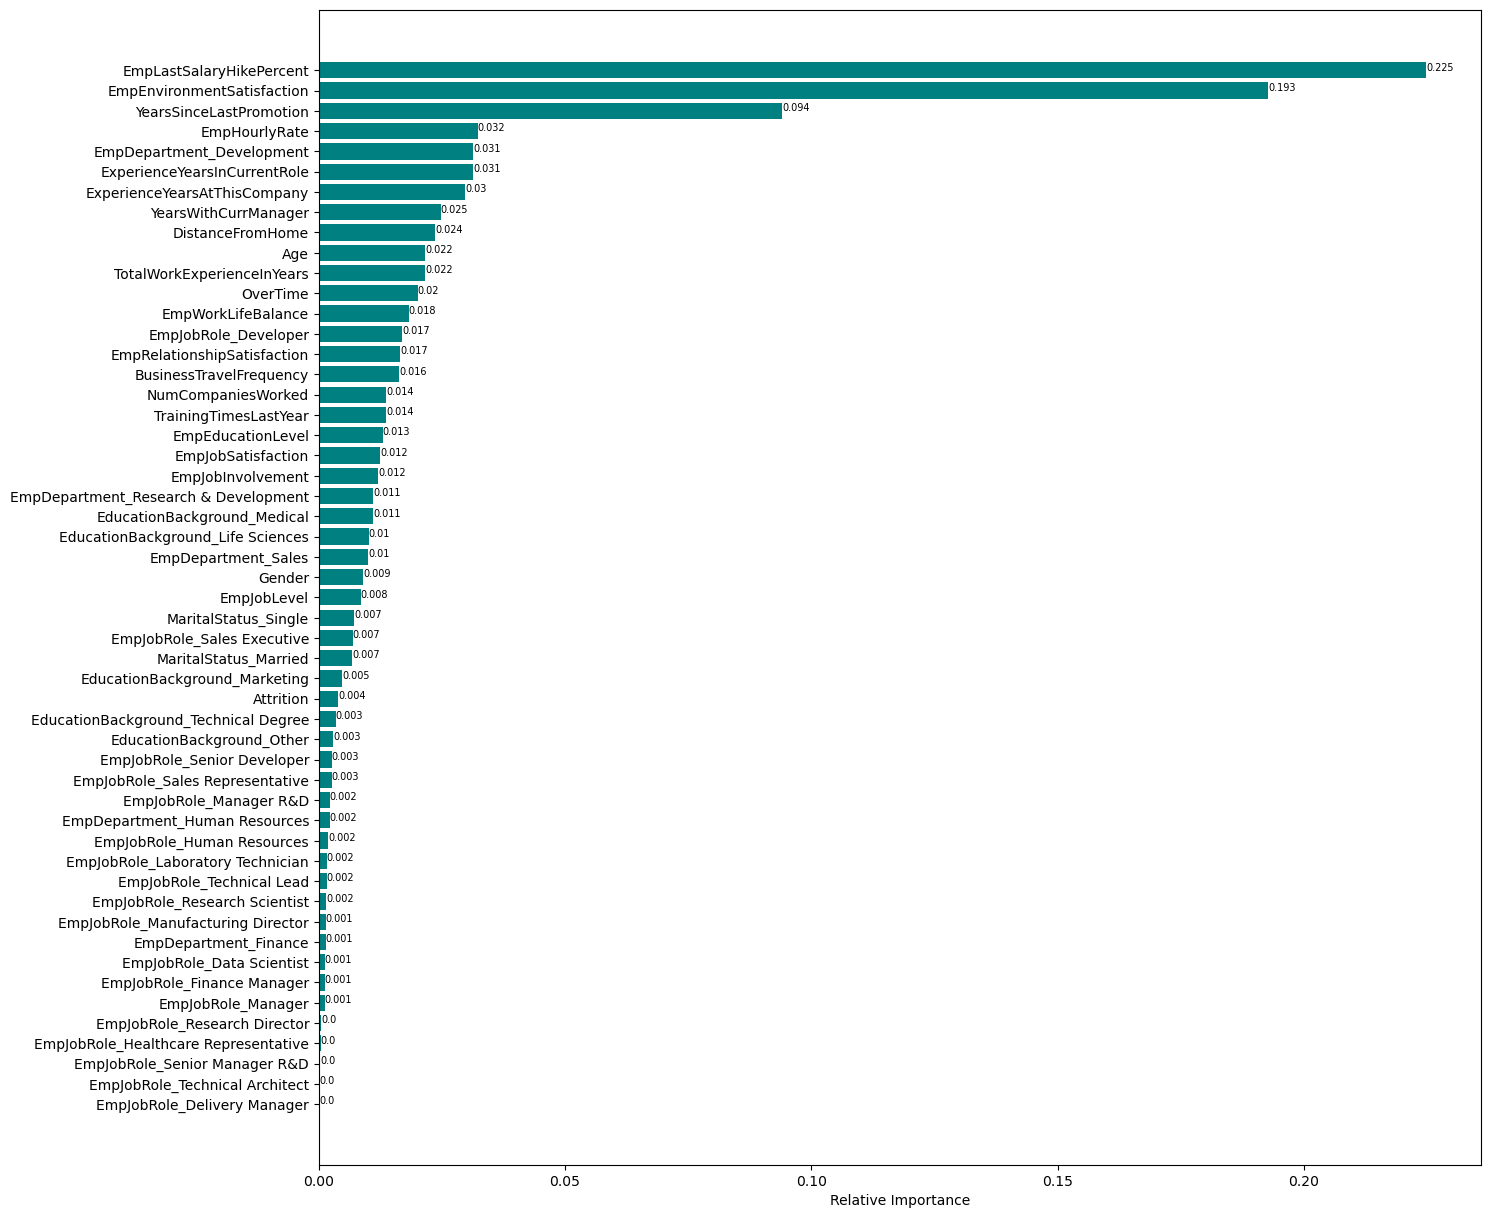

In [77]:
# tuned model feature importance

#getting feature importances from the tuned random forest model
importances= tuned_rf.feature_importances_
feature_names= X.columns

# sort the features by importance
indices= np.argsort(importances)

# Creating a horizontal bar plot of the feature importances
plt.figure(figsize= (15, 15))
plt.barh(range(len(indices)), importances[indices], color= 'teal', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Adding labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

### SUPPORT VECTOR MACHINE

In [78]:
# Training the model

# importing the model
from sklearn.svm import SVC

# Initiating the model
svm_model= SVC()

# fitting the model to the training set
svm_model.fit(X_train_sm, y_train_sm)

SVC()

In [79]:
y_pred_svm= svm_model.predict(x_test)

In [80]:
# model evaluation

# Checking accuracy score
print(f"Model accuracy score: {accuracy_score(y_test, y_pred_svm)}")

Model accuracy score: 0.6


In [81]:
# Checking for overfitting and underfitting

Training_accuracy= svm_model.score(X_train_sm, y_train_sm)
Testing_accuracy= svm_model.score(x_test, y_test)

print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 0.7367668097281831
Testing set score: 0.6


In [82]:
# K-Fold Cross-validation

kf_svm = KFold(n_splits= 10, shuffle= False)

In [83]:
# cross validation accuracy

score = cross_val_score(svm_model, X, y, cv=kf_svm, scoring='accuracy')
print(f'Cross validation accuracy scores: {score}')

Cross validation accuracy scores: [0.89166667 0.71666667 0.7        0.65833333 0.675      0.625
 0.66666667 0.78333333 0.81666667 0.75      ]


In [85]:
svm_accuracy= pd.DataFrame({'CV mean': score.mean(), 'Std': score.std()}, index= ['Cross validation accuracy'])
svm_accuracy

,CV mean,Std
Cross validation accuracy,0.728333,0.078191


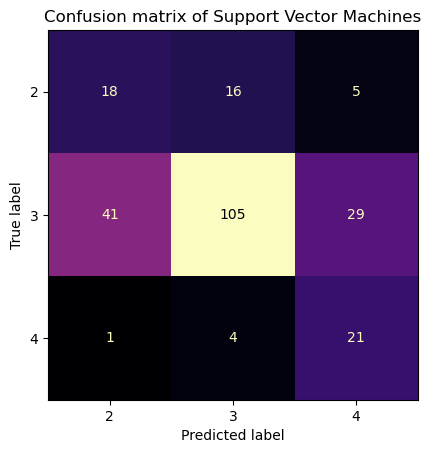

In [86]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm_model, x_test, y_test, colorbar= False, cmap= 'magma')
plt.title('Confusion matrix of Support Vector Machines')
plt.grid(False)

In [87]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           2       0.30      0.46      0.36        39
           3       0.84      0.60      0.70       175
           4       0.38      0.81      0.52        26

    accuracy                           0.60       240
   macro avg       0.51      0.62      0.53       240
weighted avg       0.70      0.60      0.63       240



In [89]:
Base_svm= metrics_calculator(y_test, y_pred_svm, 'Base SVM')
Base_svm.style.background_gradient(cmap='inferno')

,Base SVM
Accuracy,0.600000
precision,0.507273
Recall,0.623077
F1-score,0.527385


In [90]:
# saving base support vector machine model as pkl file

import joblib
joblib.dump(svm_model,"trained_model_base_svm.pkl")

['trained_model_base_svm.pkl']

### Hyperparameter tuning for SVM model

In [91]:
# model--> svm_model

# Defining search parameters
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter 
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

# Defining search
from sklearn.model_selection import GridSearchCV
search= GridSearchCV(svm_model, param_grid, scoring= 'accuracy', n_jobs= -1, cv= 5)

# Executing search
GridSearchCV = search.fit(X_train_sm, y_train_sm)

# Setting the classifier to the best combination of parameters
svm_model_cv= GridSearchCV.best_estimator_

# Summarizing the result
print('Best Score: ', GridSearchCV.best_score_)
print('Best hyperparameters: ', GridSearchCV.best_params_)

Best Score:  0.9599454483464029
Best hyperparameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [92]:
# Training the tuned svm model
svm_model_cv.fit(X_train_sm, y_train_sm)

SVC(C=10, gamma='auto')

In [93]:
# prediction

y_pred_tuned_svm= svm_model_cv.predict(x_test)

In [94]:
# tuned model evaluation
# Accuracy score

print(f'Tuned SVM model accuracy score:\n {accuracy_score(y_test, y_pred_tuned_svm)}')

Tuned SVM model accuracy score:
 0.7625


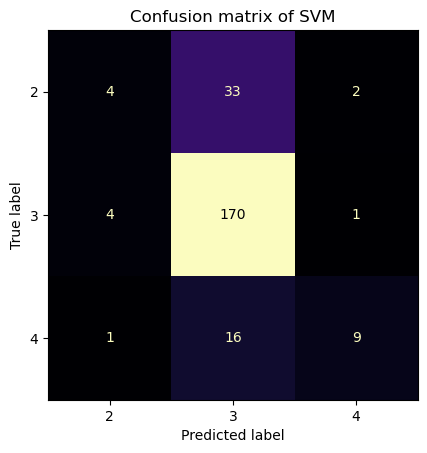

In [95]:
# Tuned model confusion matrix

ConfusionMatrixDisplay.from_estimator(svm_model_cv, x_test, y_test, colorbar= False, cmap= 'magma')
plt.title('Confusion matrix of SVM')
plt.grid(False)

In [96]:
# tuned model classification report

print(classification_report(y_test, y_pred_tuned_svm))

              precision    recall  f1-score   support

           2       0.44      0.10      0.17        39
           3       0.78      0.97      0.86       175
           4       0.75      0.35      0.47        26

    accuracy                           0.76       240
   macro avg       0.66      0.47      0.50       240
weighted avg       0.72      0.76      0.71       240



In [97]:
# tuned model performance metrics

tuned_svm_result= metrics_calculator(y_test, y_pred_tuned_svm, 'Tuned SVM')
tuned_svm_result.style.background_gradient(cmap= 'inferno')

,Tuned SVM
Accuracy,0.762500
precision,0.656900
Recall,0.473382
F1-score,0.501098


In [98]:
# saving tuned svm model as pkl file

import joblib
joblib.dump(svm_model_cv,"trained_model_tuned_svm.pkl")

['trained_model_tuned_svm.pkl']

### Hyperparameter tuning for XGBoost

In [110]:
# importing the model
import xgboost as xg

# label encoding the target variable to have values of 0, 1, 2 of performance rating to have easy model implementation
from sklearn.preprocessing import LabelEncoder
label_encoder_xgboost = LabelEncoder()
y_train_sm_encoded = label_encoder_xgboost.fit_transform(y_train_sm)

# creating xgboost classfier
xgboost= xg.XGBClassifier(objective= 'multi:softmax', learning_rate= 0.1)

# Defining a dictionary of hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

In [111]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(estimator= xgboost, param_grid= param_grid, scoring= 'accuracy', n_jobs= -1, cv= 10)

# executing the search
GridSearchCV= search.fit(X_train_sm, y_train_sm_encoded)

In [112]:
# Setting the classifier to the best combination of parameters
xg_boost_model_cv= GridSearchCV.best_estimator_

# Summarizing the result
print('Best Score: ', GridSearchCV.best_score_)
print('Best hyperparameters:', GridSearchCV.best_params_)

Best Score:  0.9694805194805195
Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}


In [113]:
# training the tuned model

# fitting the extreme gradient boosting model on the training set
xg_boost_model_cv.fit(X_train_sm, y_train_sm_encoded)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [114]:
# prediction

y_pred_tuned_xgboost= xg_boost_model_cv.predict(x_test)

In [115]:
# model evaluation

# Encoding y_test data to have 0, 1, 2 orders of performance rating
y_test_encoded = label_encoder_xgboost.transform(y_test)

# accuracy score
a = accuracy_score(y_test_encoded, y_pred_tuned_xgboost)
print(f'Accuracy score of the XG boost model: {a}')

Accuracy score of the XG boost model: 0.9375


In [116]:
# cross validated score

from sklearn.model_selection import cross_val_score
cross_val_scores= cross_val_score(xg_boost_model_cv, X_train_sm, y_train_sm_encoded, cv= 10, scoring= 'accuracy')

print('Cross-validated score of the XG Boost Model:', cross_val_scores.mean())

Cross-validated score of the XG Boost Model: 0.9694805194805195


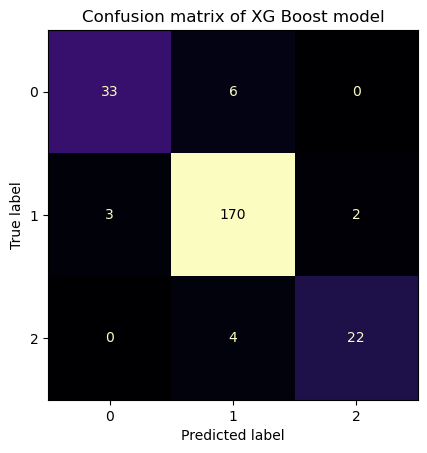

In [117]:
# Tuned model confusion matrix

ConfusionMatrixDisplay.from_estimator(xg_boost_model_cv, x_test, y_test_encoded, colorbar= False, cmap= 'magma')
plt.title('Confusion matrix of XG Boost model')
plt.grid(False)

In [118]:
# tuned model classification report

print(classification_report(y_test_encoded, y_pred_tuned_xgboost))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.94      0.97      0.96       175
           2       0.92      0.85      0.88        26

    accuracy                           0.94       240
   macro avg       0.93      0.89      0.91       240
weighted avg       0.94      0.94      0.94       240



In [119]:
xg_boost_result= metrics_calculator(y_test_encoded, y_pred_tuned_xgboost, 'Tuned XGBoost')
xg_boost_result.style.background_gradient(cmap='inferno')

,Tuned XGBoost
Accuracy,0.937500
precision,0.925926
Recall,0.887912
F1-score,0.905915


In [122]:
# saving tuned xg boost model as pkl file

import joblib
joblib.dump(xg_boost_model_cv,"xgboost_trained_and_tuned_model.pkl")

['xgboost_trained_and_tuned_model.pkl']